In [19]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy.integrate as integrate
import jax.scipy
import seaborn as sns
import matplotlib.pyplot as plt

## Programming the Fundamental Theorem of Calculus

Reference: [Count Bayesie](https://www.countbayesie.com/blog/2015/7/19/fundamental-theorem-of-calculus)
 - Will Kurt completed the blog post in R, and I have decided to recreate the blog post from scratch in Python using scipy, numpy, and JAX



The Fundamental Theorem of Calculus is truly one of the most beautiful, and elegant ideas we find in mathematics. It relates the Integral to the Derivative. There are two parts to the theorem:

1.)

2.) How do we compute integrals?

$\int_a^b f(x)dx = F(b) - F(a)$

where $f(x)$ is the derivative of $F(x)$, or we can refer to $F(x)$ as the anti-derivative of $f(x)$
 - "The area under the curve from $a$ to $b$ of a function $f$ is just the difference between the values of that functions anti-derivative, $F$, at $b$ and $a$"

### Example

Since $x^2$ is the derivative of $\frac{1}{3}x^3$ for any given $a$ and $b$ we can calculate the area under the curve of $x^2$ as simply:

$\int_a^b x^2 dx = \frac{1}{3}b^3 - \frac{1}{3}a^3$

and plugging in values for $a$ and $b$, we can calculate the integral between these two values (i.e., 20 and 40):

$\int_{20}^{40} x^2 dx = \frac{1}{3}40^3 - \frac{1}{3}20^3$

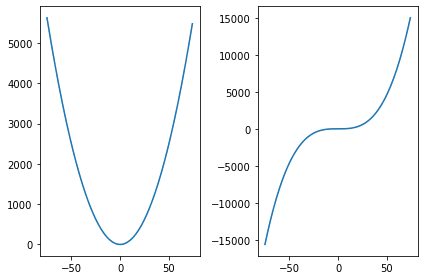

In [25]:
x = np.random.randint(-75, 75, 500)
x2 = x**2
x3 = (1/3* x) ** 3

fig, (ax1, ax2) = plt.subplots(ncols=2)
sns.lineplot(x=x, y=x2, ax=ax1)
sns.lineplot(x=x, y=x3, ax=ax2)
plt.tight_layout()
plt.show()

In [26]:
# Integration function using scipy

### Another way to integrate - a distribution

Looking at the Beta distribution - Beta (2, 16). Unlike $x^2$ the Beta distribution is only defined on the domain [0, 1]

A simple way of approximating the integral of a function to a reasonable precision is by simply making a _discrete approximation_ of the integral:

$\int_{0.2}^{0.4} Beta(2, 16)$

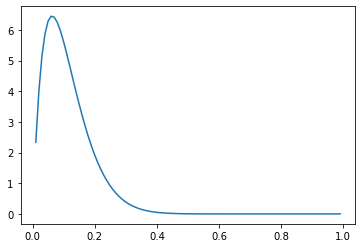

In [8]:
a, b = 2, 16
x = np.linspace(0.01, 0.99, 100)
plt.plot(x, stats.beta.pdf(x, a, b))
plt.show()

The code cell below is approximating the curve as a bunch of $dx$ wide rectangles with heights = $f(x)$. Therefore, the smaller the $dx$ value, the better the approximation is

In [14]:
# Calculate the area under the curve from 0.2 - 0.4
dx = 0.0001
xs = np.arange(0.2, 0.4, step=dx)

#plt.hist(xs, stats.beta.pdf(x, a, b))
np.sum(stats.beta.pdf(xs, a, b))*dx

0.11622503354514985

### Building the CDF 

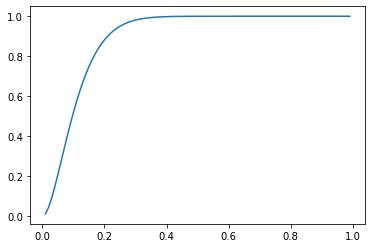

In [15]:
# With scipy
cdf = stats.beta.cdf(x, a, b)
plt.plot(x, stats.beta.cdf(x, a, b))

In [20]:
# Via scipy 
table = {'x': x,
         'cumulative probability': cdf}
cdf_df = pd.DataFrame(table)
cdf_df

,x,cumulative probability
0,0.010000,0.012309
1,0.019899,0.044182
2,0.029798,0.089863
3,0.039697,0.144755
4,0.049596,0.205228
...,...,...
95,0.950404,1.000000
96,0.960303,1.000000
97,0.970202,1.000000
98,0.980101,1.000000


In [45]:
# How to compute cumulative probs. with approximation from scratch?

# 1.) Break up domain into discrete chunks (intervals) over the domain [0, 1]
# 2.) 

def cdf_approx(dx):
    xs = np.arange(0, 1, step=dx)
    # Cumulative sum values that "lie" in the rectangular width "dx"
    cdf = np.cumsum(stats.beta.pdf(xs, 2, 16)*dx)
    plt.plot(xs, cdf)
    plt.ylabel('Cumulative Probability')
    plt.xlabel('value')
    plt.show()

    table = {'x': xs, 'cumulative probability': cdf}
    cum_pdf = pd.DataFrame(table)
    
    return cum_pdf


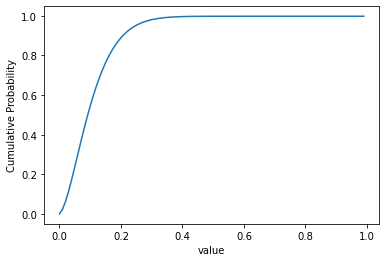

,x,cumulative probability
0,0.00,0.000000
1,0.01,0.023394
2,0.02,0.063572
3,0.03,0.115245
4,0.04,0.174224
...,...,...
95,0.95,0.997736
96,0.96,0.997736
97,0.97,0.997736
98,0.98,0.997736


In [48]:
cdf_approx(0.01)

### Summary

The __PDF__ is the derivative of the __CDF__ and therefore, the __CDF__ is the anti-derivative of the __PDF__. The difference between the CDF at two points show the total probability between those two values:

$\int_a^b pdf * dx = cdf(b) - cdf(a)$

$pdf := stats.beta(xs, 2, 16)$

$cdf := np.cumsum(stats.beta(xs, 2, 16)*dx)$

_np.diff()_ computes differences among values, so we can use the common $dy$ notation:

$dy := diff(cdf)$

Differencing is the inverse of np.cumsum(), therefore, we know that:

$diff(cdf) = pdf * dx$

then. . .

$dy = pdf * dx$ --> $\frac{dx}{dy} = pdf$
